Python for Data Analysis - Mehdi Leqsiouer & Morgan Leblond

In [1]:
!pip install flask==1.1.2

You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
#Import of all libraries we need
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from flask import Flask
import seaborn as sns
import numpy as np

In [3]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [4]:
#Retrieve and convert training data into dataframe
training_set = pd.read_csv('sat.trn', delimiter=' ', nrows = None, header = None)
training_set.dataframeName = 'training_set'
training_set.columns = [*training_set.columns[:-1], 'Y']
nRow, nCol = training_set.shape
print(training_set.shape)
training_set.head(5)

(4435, 37)


,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,Y
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3


In [5]:
#Retrieve and convert testing data into dataframe
testing_set = pd.read_csv('sat.tst', delimiter=' ', nrows = None, header = None)
testing_set.dataframeName = 'testing_set'
testing_set.columns = [*testing_set.columns[:-1], 'Y']
nRow, nCol = testing_set.shape
print(testing_set.shape)
testing_set.head(5)

(2000, 37)


,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,Y
0,80,102,102,79,76,102,102,79,76,102,...,87,79,107,109,87,79,107,113,87,3
1,76,102,102,79,76,102,106,83,76,102,...,87,79,107,113,87,79,103,104,83,3
2,80,98,106,79,76,94,102,76,76,94,...,79,79,95,100,79,79,95,96,75,4
3,76,94,102,76,76,94,102,76,76,94,...,79,79,95,96,75,79,95,100,75,4
4,76,94,102,76,76,94,102,76,76,89,...,75,79,95,100,75,75,95,100,79,4


In [6]:
#Define features and target
X_train = training_set.iloc[:, :-1]
y_train = training_set["Y"]
X_test = testing_set.iloc[:, :-1]
y_test = testing_set["Y"]

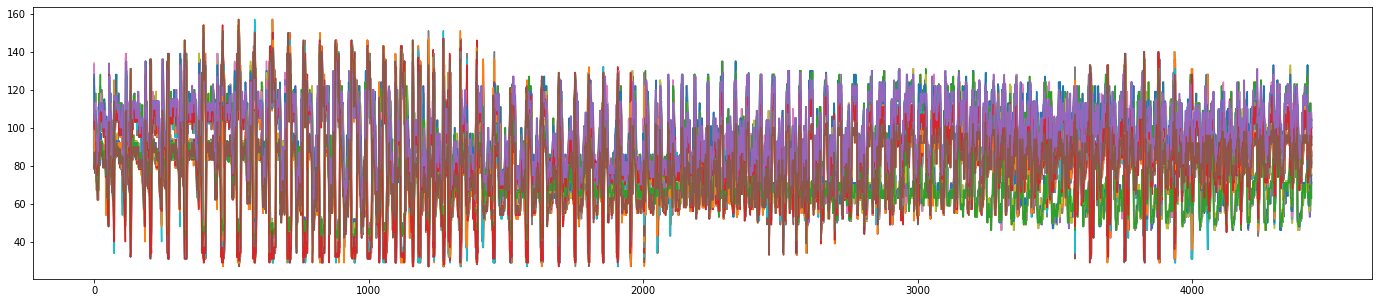

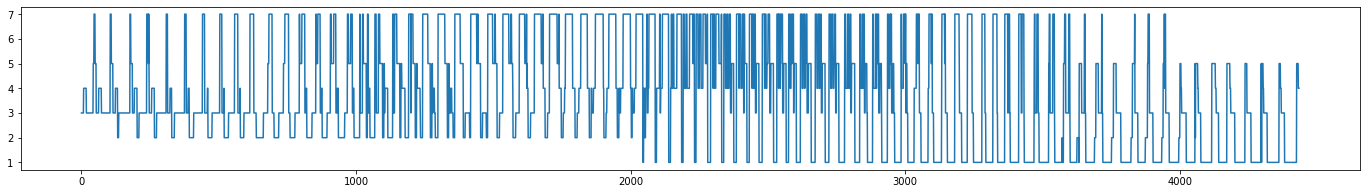

In [7]:
# Plot #1: Display values of all the rows on all the column
fig, ax = plt.subplots(figsize=(24,5))
pd.DataFrame(X_train.reset_index(drop=True)).plot(ax=ax, legend=False)
plt.show()

fig, ax = plt.subplots(figsize=(24,3))
y_train.reset_index(drop=True).plot(ax=ax)
plt.show()

In [8]:
#Create a Gaussian Classifier
classifier=RandomForestClassifier(n_estimators=100)

In [9]:
#Train the model using the training sets y_pred=clf.predict(X_test)
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [10]:
#Prediction
y_pred=classifier.predict(X_test)

In [11]:
#Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9105


<AxesSubplot:>

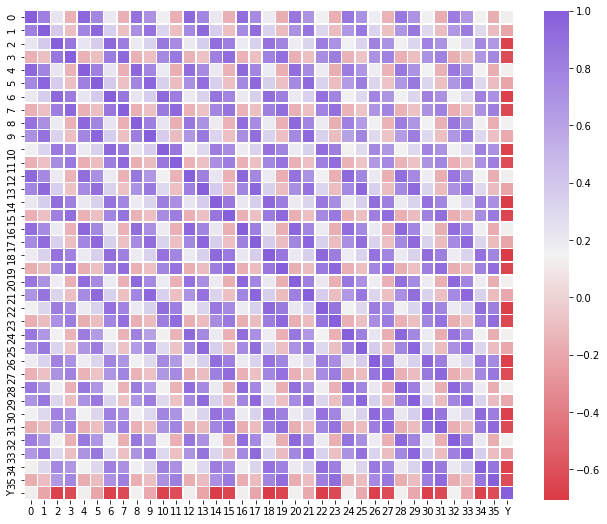

In [12]:
#Plot #2: PCC figure
corr = training_set.corr(method = 'pearson')
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(10, 275, as_cmap=True)

sns.heatmap(corr, cmap=cmap, square=True,
            linewidths=0.5,  ax=ax)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  # Remove the CWD from sys.path while we load stuff.


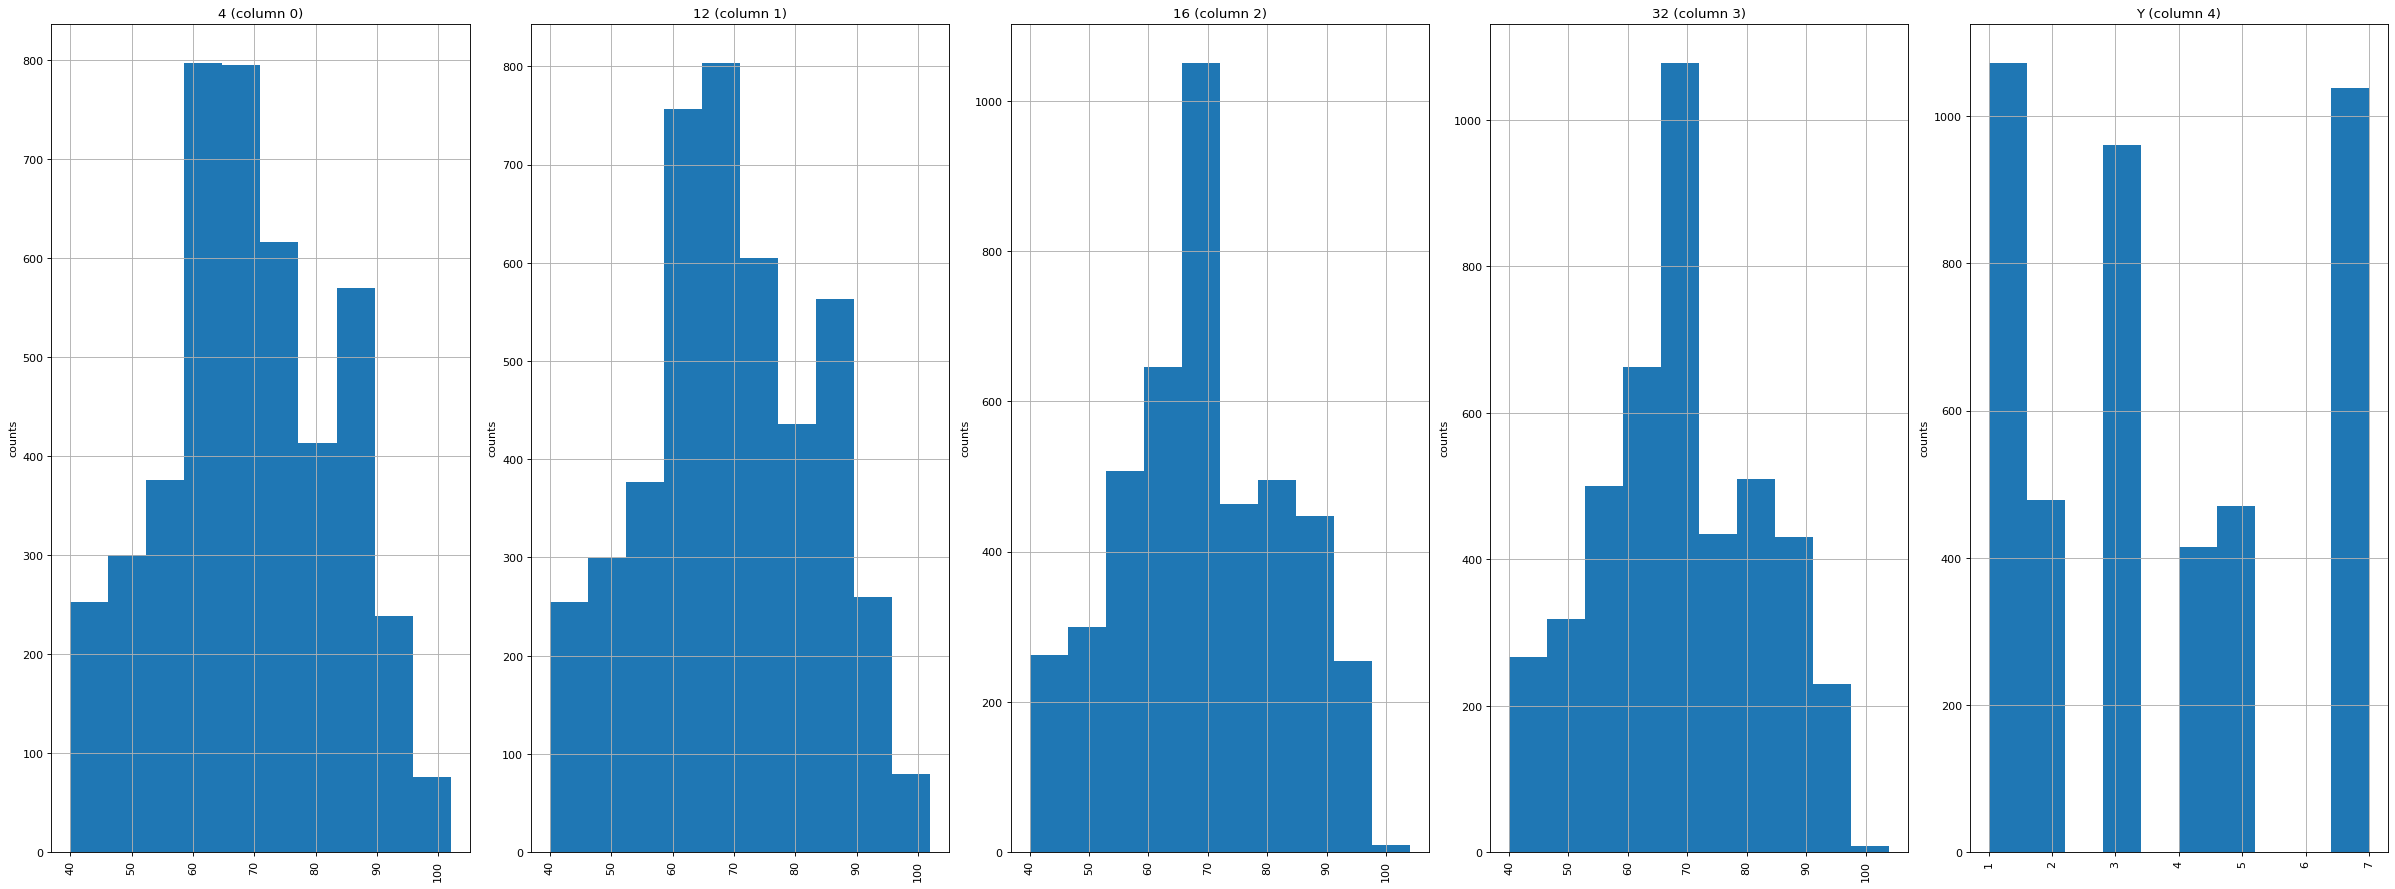

In [13]:
#Plot #3: Repartition for some columns based on training dataset
plotPerColumnDistribution(training_set, len(training_set.columns), 10)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  # Remove the CWD from sys.path while we load stuff.


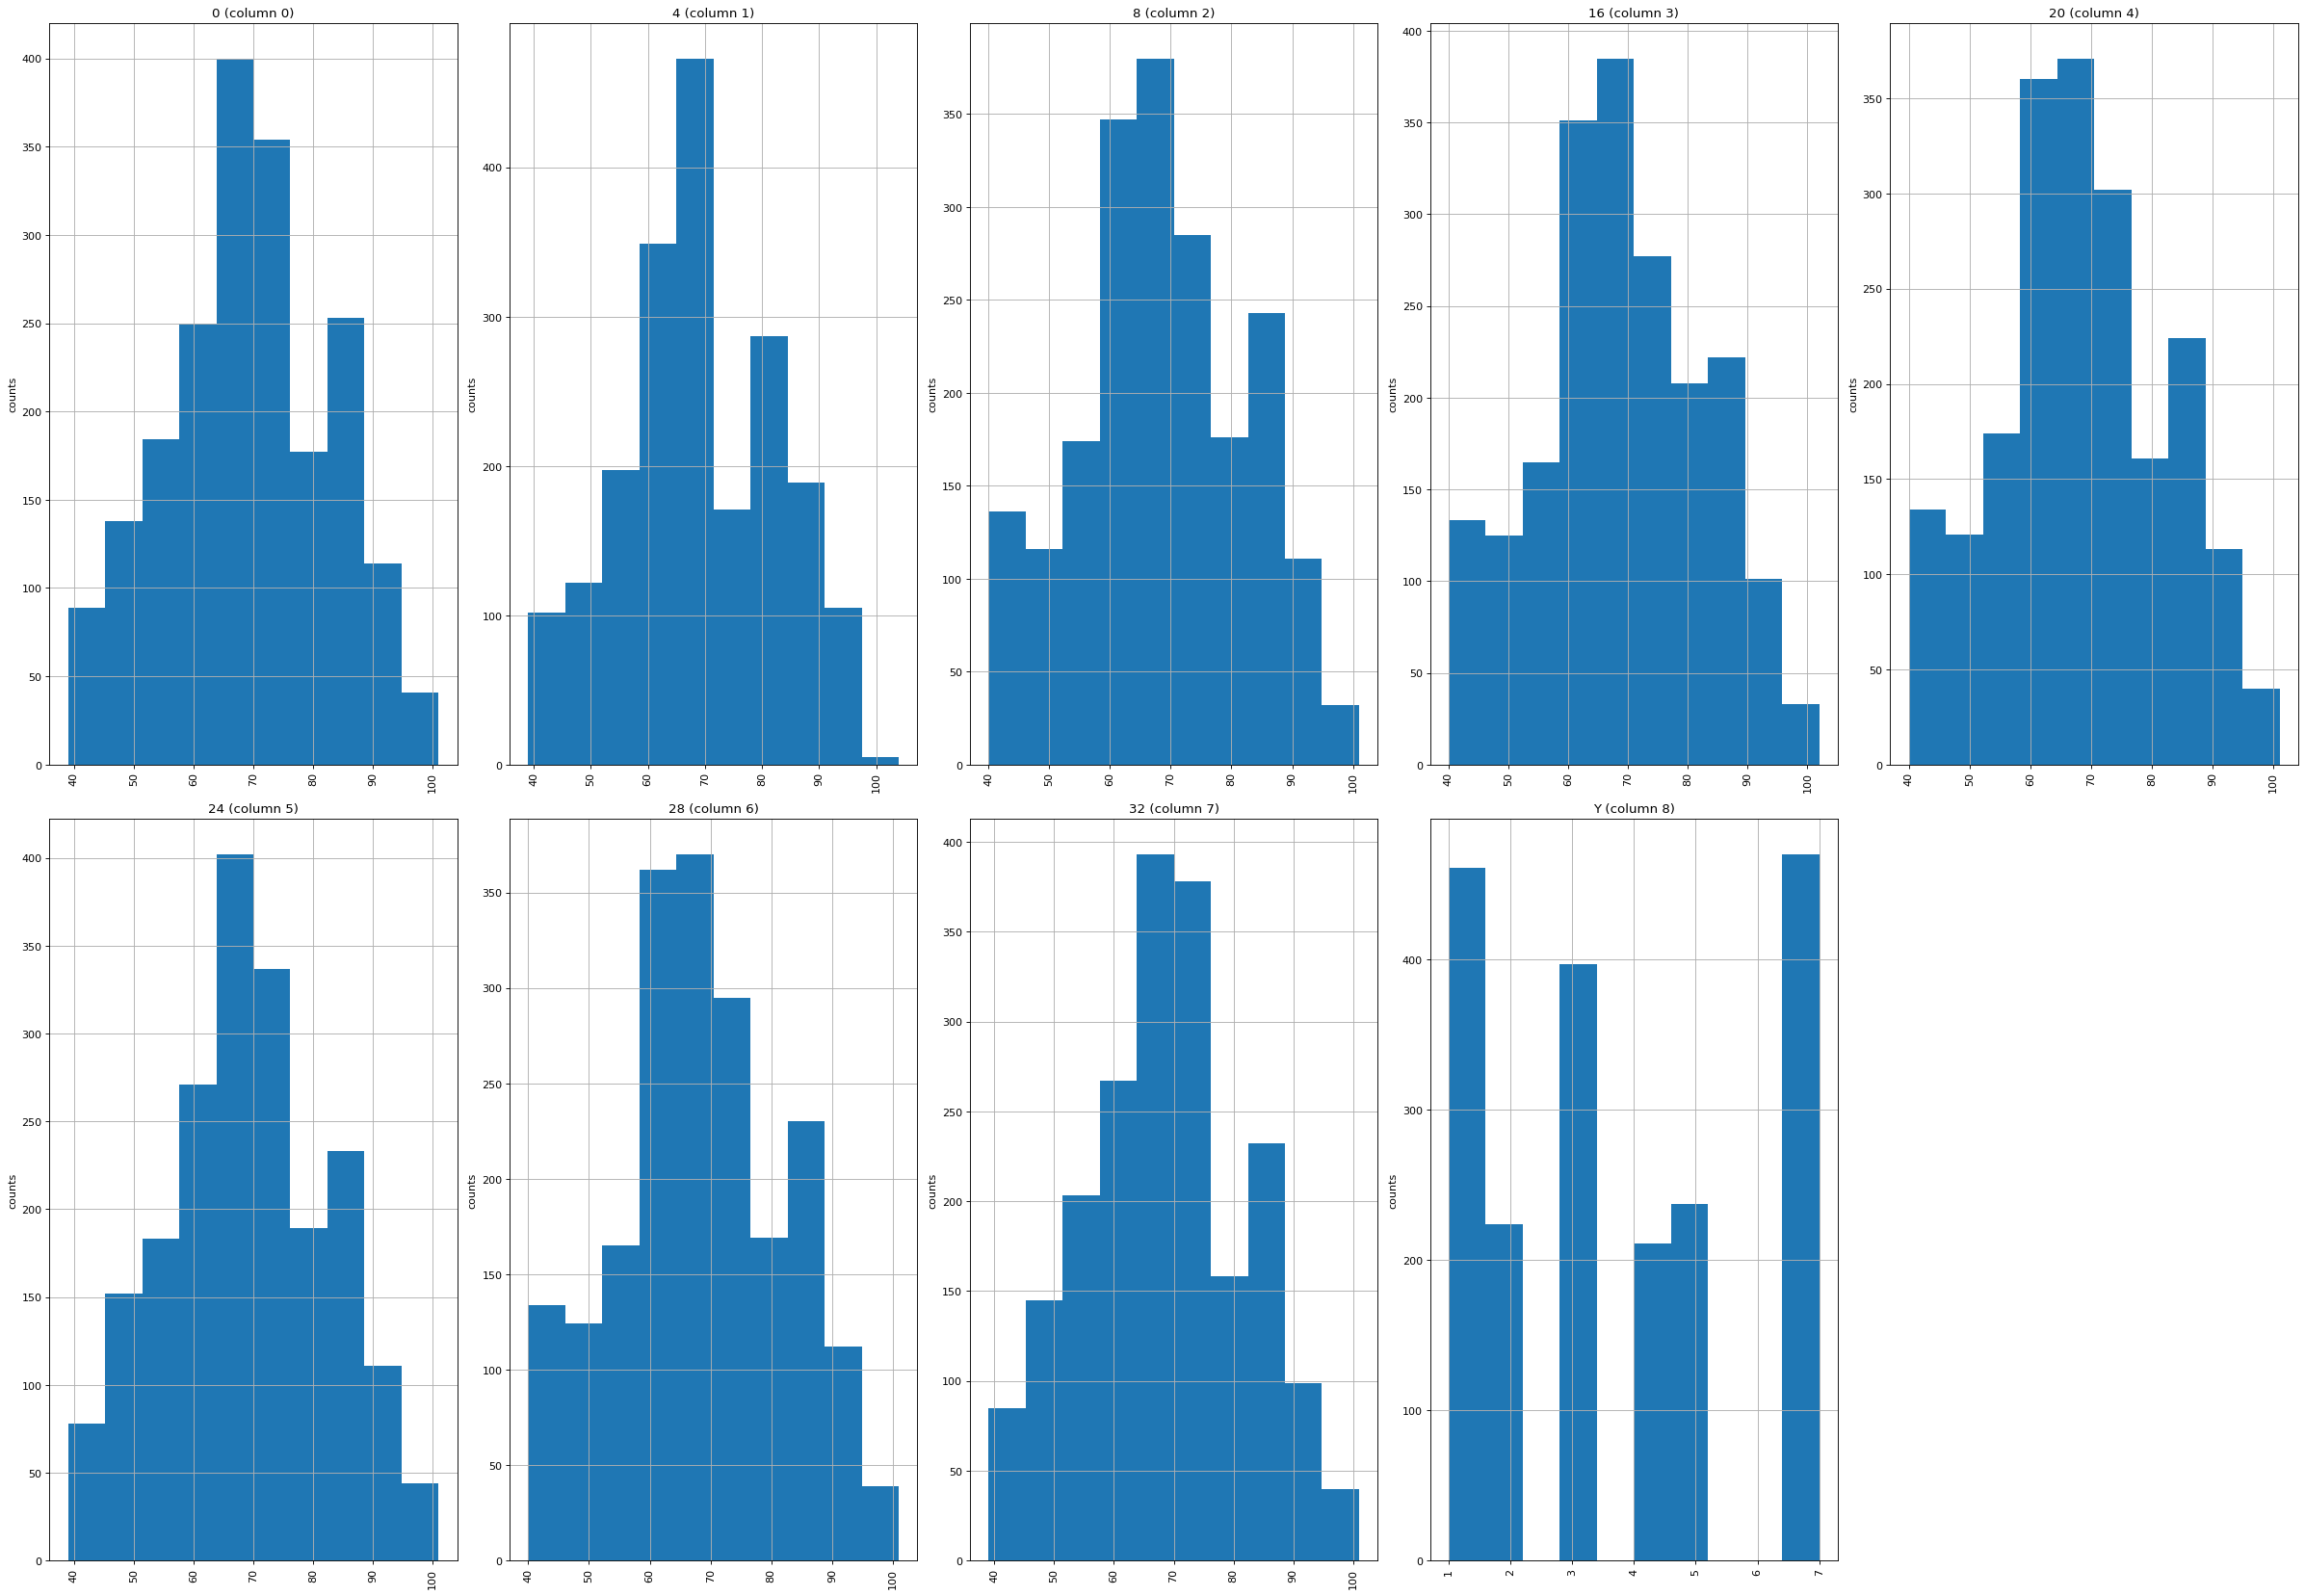

In [14]:
#Plot #4: Repartition for some columns based on testing dataset
plotPerColumnDistribution(testing_set, len(testing_set.columns), 5)

Text(0.5, 1.0, 'Scatter')

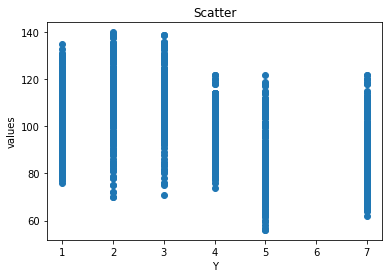

In [15]:
#Plot #5: Repartition of the value of the third column depending on the Y value
plt.scatter(training_set['Y'].to_frame(),training_set[2].to_frame())
plt.xlabel('Y')
plt.ylabel('values')
plt.title('Scatter')

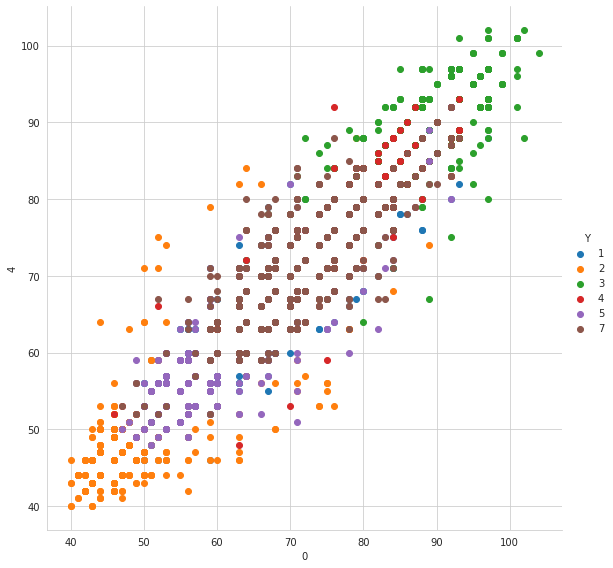

In [16]:
#Plot #6: Scatter plot based on the value of two differents columns with each value of Y colored 
sns.set_style("whitegrid")
sns.FacetGrid(training_set, hue="Y", height=8) \
   .map(plt.scatter, 0, 4) \
   .add_legend()
plt.show()

Text(0, 0.5, 'Difference between testing set values and predicted values')

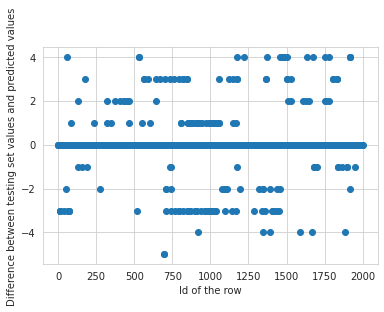

In [17]:
g=plt.plot(y_test - y_pred,marker='o',linestyle='')
plt.xlabel("Id of the row")
plt.ylabel("Difference between testing set values and predicted values")